# Trabalho prático de Elementos de inteligencia artificial


In [47]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from distritos import dicionario_distritos
import matplotlib.pyplot as plt

## Recolha de Dados

In [48]:
LINKS = [
    "https://www.pordata.pt/pt/estatisticas/saude/pessoal-de-saude/pessoal-ao-servico-nos-hospitais-portugal",
    "https://www.pordata.pt/pt/estatisticas/populacao/esperanca-de-vida-e-obitos/taxa-bruta-de-mortalidade-0",
    "https://www.pordata.pt/pt/estatisticas/populacao/nascimentos-e-fecundidade/taxa-bruta-de-natalidade-0"
]

dataframes: dict[str, pd.DataFrame] = {
    "pessoal-servico": None,
    "mortalidade": None,
    "natalidade": None
}

c = -1
for url in LINKS:
    c += 1
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Erro ao tentar acessar ao site: {url}")
        continue
    
    soup = BeautifulSoup(response.text, "html.parser")

    download_btn = soup.find("a", id="download-btn")

    if not download_btn or not download_btn.has_attr("href"):
        print(f"Erro ao tentar acessar o csv do link {url}")
        continue
    
    match c:
        case 0:
            dataframes["pessoal-servico"] = pd.read_csv(download_btn["href"])
        case 1:
            dataframes["mortalidade"] = pd.read_csv(download_btn["href"])
        case 2:
            dataframes["natalidade"] = pd.read_csv(download_btn["href"])

## Integração de Dados / Análise Exploratória

#### Pessoal ao serviço nos hospitais

In [49]:
# Deixar só os municipios e apagar dados gerais nacionais
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].dropna(subset=["03. Âmbito Geográfico"])

#Apagar colunas futeis
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].drop(columns=["03. Âmbito Geográfico", "06. Filtro 2", "07. Filtro 3", "08. Escala", "09. Símbolo"])

#Mudar nome das colunas
dataframes["pessoal-servico"] = dataframes["pessoal-servico"].rename(columns={"01. Ano": "Ano",
                                                                              "02. Nome Região (Portugal)": "Nome Municipio",
                                                                              "04. Indicador": "Tipo de Hospital",
                                                                              "05. Filtro 1": "Tipo de Pessoal Medico",
                                                                              "10. Valor": "Quantidade de Pessoal Medico"
                                                                              })

#Mudar o tipo da coluna do ano para um numero inteiro
dataframes["pessoal-servico"][dataframes["pessoal-servico"].columns[0]] = dataframes["pessoal-servico"][dataframes["pessoal-servico"].columns[0]].astype(int)

dataframes["pessoal-servico"].head(100)

,Ano,Nome Municipio,Tipo de Hospital,Tipo de Pessoal Medico,Quantidade de Pessoal Medico
216,2002,Abrantes,Hospitais,Enfermeiros,207.0
217,2002,Abrantes,Hospitais,Médicos,73.0
218,2002,Abrantes,Hospitais,Outros,132.0
219,2002,Abrantes,Hospitais,Pessoal auxiliar,159.0
220,2002,Abrantes,Hospitais,Técnicos de diagnóstico e terapêutica,34.0
...,...,...,...,...,...
311,2002,Aljustrel,Hospitais,Total,0.0
312,2002,Almada,Hospitais,Enfermeiros,712.0
313,2002,Almada,Hospitais,Médicos,440.0
314,2002,Almada,Hospitais,Outros,384.0


#### Taxa Bruta de Mortalidade

In [50]:
# Deixar só os municipios e apagar dados gerais nacionais
dataframes["mortalidade"] = dataframes["mortalidade"].dropna(subset=["04. Âmbito Geográfico"])

#Apagar colunas futeis
dataframes["mortalidade"] = dataframes["mortalidade"].drop(columns=["02. Nome País (Europa)", "04. Âmbito Geográfico", "05. Filtro 1", "06. Filtro 2", "07. Filtro 3", "08. Escala", "09. Símbolo"])

#Mudar nome das colunas
dataframes["mortalidade"] = dataframes["mortalidade"].rename(columns={"01. Ano": "Ano",
                                                                      "03. Nome Região (Portugal)": "Nome Municipio",
                                                                      "10. Valor": "Taxa Bruta de Mortalidade (‰)"
                                                                    })

#Mudar o tipo da coluna do ano para um numero inteiro
dataframes["mortalidade"][dataframes["mortalidade"].columns[0]] = dataframes["mortalidade"][dataframes["mortalidade"].columns[0]].astype(int)

display(dataframes["mortalidade"].head(100))

,Ano,Nome Municipio,Taxa Bruta de Mortalidade (‰)
1792,1996,Abrantes,14.5
1793,1996,Águeda,8.7
1794,1996,Aguiar da Beira,17.0
1795,1996,Alandroal,15.5
1796,1996,Albergaria-a-Velha,9.0
...,...,...,...
1887,1996,Felgueiras,6.4
1888,1996,Ferreira do Alentejo,14.2
1889,1996,Ferreira do Zêzere,17.1
1890,1996,Figueira da Foz,12.2


#### Taxa Bruta de Natalidade

In [51]:
# Deixar só os municipios e apagar dados gerais nacionais
dataframes["natalidade"] = dataframes["natalidade"].dropna(subset=["04. Âmbito Geográfico"])

#Apagar colunas futeis
dataframes["natalidade"] = dataframes["natalidade"].drop(columns=["02. Nome País (Europa)", "04. Âmbito Geográfico", "05. Filtro 1", "06. Filtro 2", "07. Filtro 3", "08. Escala", "09. Símbolo"])

#Mudar nome das colunas
dataframes["natalidade"] = dataframes["natalidade"].rename(columns={"01. Ano": "Ano",
                                                                    "03. Nome Região (Portugal)": "Nome Municipio",
                                                                    "10. Valor": "Taxa Bruta de Natalidade (‰)",
                                                                    })


#Mudar o tipo da coluna do ano para um numero inteiro
dataframes["natalidade"][dataframes["natalidade"].columns[0]] = dataframes["natalidade"][dataframes["natalidade"].columns[0]].astype(int)

dataframes["natalidade"].head(100)

,Ano,Nome Municipio,Taxa Bruta de Natalidade (‰)
1792,1995,Abrantes,7.0
1793,1995,Águeda,10.6
1794,1995,Aguiar da Beira,9.0
1795,1995,Alandroal,6.3
1796,1995,Albergaria-a-Velha,10.7
...,...,...,...
1887,1995,Felgueiras,16.7
1888,1995,Ferreira do Alentejo,7.7
1889,1995,Ferreira do Zêzere,6.3
1890,1995,Figueira da Foz,9.1


#### Conjugação dos csv"s

In [52]:
#Remoção das colunas com os valores inferiores a 2002, pois o pessoal medico não tem valores sobre tais anos
dataframes["mortalidade"] = dataframes["mortalidade"][dataframes["mortalidade"]["Ano"] >= 2002]
dataframes["natalidade"] = dataframes["natalidade"][dataframes["natalidade"]["Ano"] >= 2002]

#Remoção das colunas com os valores de 2024 da mortalidade, pois tanto a natalidade quando o pessoal não tem desse ano
dataframes["mortalidade"] = dataframes["mortalidade"][dataframes["mortalidade"]["Ano"] < 2024]
display(dataframes["pessoal-servico"].head())


df_final = pd.merge(dataframes["pessoal-servico"], dataframes["mortalidade"])
df_final = pd.merge(df_final, dataframes["natalidade"])

,Ano,Nome Municipio,Tipo de Hospital,Tipo de Pessoal Medico,Quantidade de Pessoal Medico
216,2002,Abrantes,Hospitais,Enfermeiros,207.0
217,2002,Abrantes,Hospitais,Médicos,73.0
218,2002,Abrantes,Hospitais,Outros,132.0
219,2002,Abrantes,Hospitais,Pessoal auxiliar,159.0
220,2002,Abrantes,Hospitais,Técnicos de diagnóstico e terapêutica,34.0


# bueda cenas


#### Adição da coluna de Distrito

In [53]:
df_final["Distrito"] = df_final["Nome Municipio"].map(dicionario_distritos)
df_final = df_final[["Ano", "Distrito", "Nome Municipio",
                     "Tipo de Hospital", "Tipo de Pessoal Medico",
                     "Quantidade de Pessoal Medico", 
                     "Taxa Bruta de Mortalidade (‰)", 
                     "Taxa Bruta de Natalidade (‰)"
                    ]]

df_final.to_csv("final.csv", index=False)

#### Verificar valores duplicados

In [54]:
print("Linhas duplicadas:", int(df_final.duplicated().sum()))

Linhas duplicadas: 0


#### Verificar valores em falta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ano                            60984 non-null  int64  
 1   Distrito                       60984 non-null  object 
 2   Nome Municipio                 60984 non-null  object 
 3   Tipo de Hospital               60984 non-null  object 
 4   Tipo de Pessoal Medico         60984 non-null  object 
 5   Quantidade de Pessoal Medico   54828 non-null  float64
 6   Taxa Bruta de Mortalidade (‰)  60984 non-null  float64
 7   Taxa Bruta de Natalidade (‰)   60984 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.7+ MB
None


,Ano,Distrito,Nome Municipio,Tipo de Hospital,Tipo de Pessoal Medico,Quantidade de Pessoal Medico,Taxa Bruta de Mortalidade (‰),Taxa Bruta de Natalidade (‰)
24,2002,Distrito de Aveiro,Albergaria-a-Velha,Hospitais,Enfermeiros,NaN,10.4,11.1
25,2002,Distrito de Aveiro,Albergaria-a-Velha,Hospitais,Médicos,NaN,10.4,11.1
26,2002,Distrito de Aveiro,Albergaria-a-Velha,Hospitais,Outros,NaN,10.4,11.1
27,2002,Distrito de Aveiro,Albergaria-a-Velha,Hospitais,Pessoal auxiliar,NaN,10.4,11.1
28,2002,Distrito de Aveiro,Albergaria-a-Velha,Hospitais,Técnicos de diagnóstico e terapêutica,NaN,10.4,11.1
...,...,...,...,...,...,...,...,...
40639,2023,Distrito de Viseu,Viseu,Hospitais,Médicos,NaN,10.3,7.7
40640,2023,Distrito de Viseu,Viseu,Hospitais,Outros,NaN,10.3,7.7
40641,2023,Distrito de Viseu,Viseu,Hospitais,Pessoal auxiliar,NaN,10.3,7.7
40642,2023,Distrito de Viseu,Viseu,Hospitais,Técnicos de diagnóstico e terapêutica,NaN,10.3,7.7


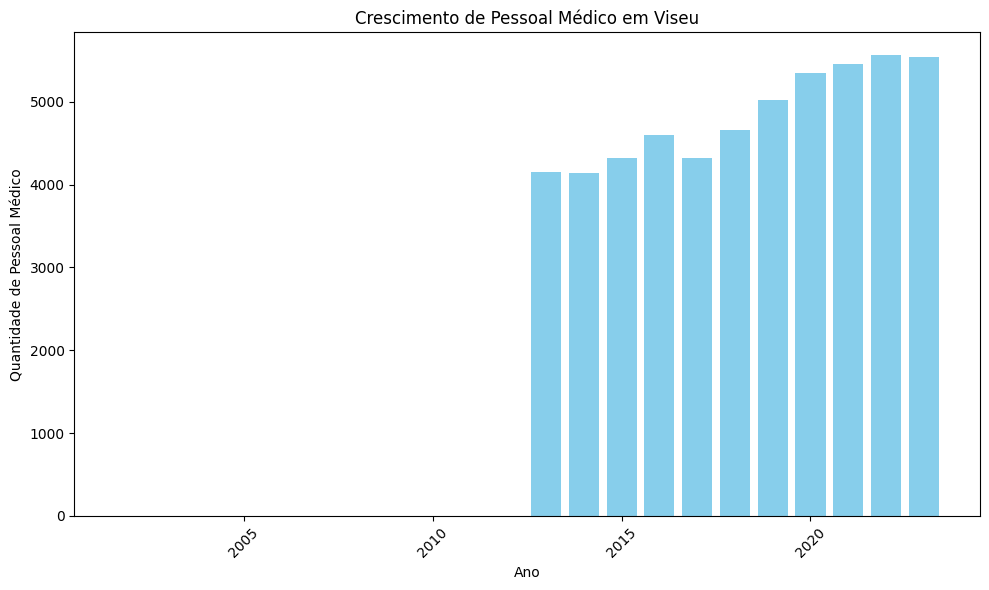

In [59]:
print(df_final.info())

display(df_final[df_final.isna().any(axis=1)])

df_municipio = df_final[df_final["Nome Municipio"] == "Viseu"]

df_grouped = df_municipio.groupby("Ano")["Quantidade de Pessoal Medico"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_grouped["Ano"], df_grouped["Quantidade de Pessoal Medico"], color='skyblue')
plt.title(f"Crescimento de Pessoal Médico em Viseu")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Pessoal Médico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
display(df.duplicated().head())

In [ ]:
print(f"Duplicados:", df.duplicated().sum())

In [ ]:
col_geo_scope = "04. Âmbito Geográfico"
val_municipality_identifier = "Município" # Verifique este valor! (Ex: "Concelho")

# Nome da coluna que contém o nome do município
col_municipality_name = "03. Nome Região (Portugal)"

# Nome da coluna que contém o valor da taxa de mortalidade
col_valor = "10. Valor"

# Lista de colunas que você quer MANTER após filtrar por municípios.
# CERTIFIQUE-SE que "col_municipality_name" e "col_valor" (se usado) estão aqui.
colunas_para_manter_em_municipios = [
    "01. Ano",
    col_municipality_name,
    # "04. Âmbito Geográfico", # Opcional, pois será sempre "Município" após o filtro de linhas
    # "09. Símbolo",
    col_valor
    # Adicione ou remova colunas conforme a sua necessidade
]


df_municipios["Distrito"] = df_municipios[col_municipality_name].map(municipio_para_distrito_map)

In [ ]:
# --- 1. Filtrar Linhas: Manter apenas dados de municípios ---
if col_geo_scope not in df.columns:
    print(f"ERRO: A coluna de âmbito geográfico "{col_geo_scope}" não foi encontrada no DataFrame "df".")
    # Pode querer parar a execução aqui ou tratar o erro
else:
    df_municipios_completo = df[df[col_geo_scope] == val_municipality_identifier].copy()

    if df_municipios_completo.empty:
        print(f"Nenhum dado encontrado para o identificador de município: "{val_municipality_identifier}". Verifique as configurações.")
    else:
        print(f"--- DataFrame Filtrado por Linhas (todas as colunas de municípios) ---")
        print(df_municipios_completo.head(2)) # Mostrar apenas 2 linhas para brevity

        # --- 2. Selecionar Colunas Relevantes ---
        colunas_existentes_apos_filtro = df_municipios_completo.columns.tolist()
        colunas_finais_para_manter = [col for col in colunas_para_manter_em_municipios if col in colunas_existentes_apos_filtro]

        # Garantir que a coluna do nome do município está presente
        if col_municipality_name not in colunas_finais_para_manter:
            if col_municipality_name in colunas_existentes_apos_filtro:
                print(f"INFO: A coluna "{col_municipality_name}" foi adicionada à lista de colunas a manter, pois é essencial.")
                colunas_finais_para_manter.append(col_municipality_name)
            else:
                print(f"ERRO CRÍTICO: A coluna do nome do município "{col_municipality_name}" não existe no DataFrame filtrado.")
                # Parar ou tratar o erro
        
        df_municipios = df_municipios_completo[colunas_finais_para_manter].copy()
        print(f"\n--- DataFrame de Municípios APÓS SELEÇÃO DE COLUNAS ---")
        print(df_municipios.head(2))
        print(f"Colunas mantidas: {df_municipios.columns.tolist()}")
        print(f"Primeiros nomes de municípios (para verificar com o dicionário): {df_municipios[col_municipality_name].unique()[:5]}")


        # --- 3. Aplicar o Mapeamento para criar a coluna "Distrito" ---
        if not municipio_para_distrito_map:
            print("\nAVISO: O dicionário "municipio_para_distrito_map" está vazio. Preencha-o para criar a coluna "Distrito".")
        else:
            df_municipios["Distrito"] = df_municipios[col_municipality_name].map(municipio_para_distrito_map)
            print("\n--- DataFrame com a nova coluna "Distrito" ---")
            print(df_municipios.head())

            municipios_nao_mapeados = df_municipios[df_municipios["Distrito"].isnull()]
            if not municipios_nao_mapeados.empty:
                print("\nAVISO: Os seguintes municípios NÃO foram encontrados no dicionário e não têm distrito atribuído:")
                print(municipios_nao_mapeados[[col_municipality_name, "Distrito"]].head())


            # --- 4. Agrupar os municípios por distrito ---
            if "Distrito" in df_municipios.columns and not df_municipios["Distrito"].isnull().all():
                print("\n--- Agrupando por "Distrito" ---")
                
                # Exemplo 1: Contar quantos municípios existem por distrito
                municipios_por_distrito_count = df_municipios.groupby("Distrito")[col_municipality_name].count()
                print("\nContagem de Municípios por Distrito:")
                print(municipios_por_distrito_count.sort_values(ascending=False))

                # Exemplo 2: Calcular a média da taxa de mortalidade por distrito
                if col_valor in df_municipios.columns:
                    # Converter a coluna de valor para numérico, tratando vírgulas como decimais
                    if df_municipios[col_valor].dtype == "object":
                        df_municipios[col_valor] = df_municipios[col_valor].str.replace(",", ".", regex=False).astype(float)
                    
                    media_valor_por_distrito = df_municipios.groupby("Distrito")[col_valor].mean()
                    print(f"\nMédia da "{col_valor}" por Distrito:")
                    print(media_valor_por_distrito.sort_values(ascending=False))
                else:
                    print(f"\nAVISO: A coluna de valor "{col_valor}" não foi encontrada para calcular a média por distrito.")
            else:
                print("\nERRO ou AVISO: A coluna "Distrito" não foi criada corretamente ou está toda vazia. Verifique o mapeamento.")

In [ ]:
# Configurações (verifique se estas variáveis estão definidas com os nomes corretos das suas colunas)
col_ano = "01. Ano" # Coluna que representa o ano
# col_valor já deve estar definida (ex: "10. Valor")
# "Distrito" é a coluna que criámos com o mapeamento

# Verificar se as colunas necessárias existem em df_municipios
if col_ano not in df_municipios.columns:
    print(f"ERRO: A coluna de ano "{col_ano}" não foi encontrada em df_municipios.")
elif "Distrito" not in df_municipios.columns:
    print("ERRO: A coluna "Distrito" não foi encontrada em df_municipios. Execute o mapeamento primeiro.")
elif col_valor not in df_municipios.columns:
    print(f"ERRO: A coluna de valor "{col_valor}" não foi encontrada em df_municipios.")
else:
    # Passo 1: Garantir que a coluna de valor é numérica
    if df_municipios[col_valor].dtype == "object":
        # Tenta converter, substituindo vírgula por ponto se for o caso de decimais
        try:
            df_municipios[col_valor] = df_municipios[col_valor].str.replace(",", ".", regex=False).astype(float)
        except AttributeError: # Se não for string (ex: já é numérico mas como objeto)
             df_municipios[col_valor] = pd.to_numeric(df_municipios[col_valor], errors="coerce")
        except Exception as e:
            print(f"Aviso: Não foi possível converter a coluna "{col_valor}" para float de forma direta: {e}")
            print("Verifique se a coluna contém valores não numéricos que precisam de tratamento.")


    # Passo 2: Agrupar por Ano e Distrito, e calcular a média da taxa de mortalidade
    # O .reset_index() transforma o resultado agrupado (que é uma Série com MultiIndex) de volta num DataFrame
    df_mortalidade_por_ano_distrito = df_municipios.groupby([col_ano, "Distrito"])[col_valor].mean().reset_index()

    # Passo 3: Opcional - Renomear a coluna do valor calculado para maior clareza
    # Por exemplo, se col_valor era "10. Valor", a nova coluna após .mean() terá esse nome.
    # Podemos renomeá-la para algo como "Mortalidade_Media".
    df_mortalidade_por_ano_distrito.rename(columns={col_valor: "Mortalidade_Media"}, inplace=True)

    # Agora, df_mortalidade_por_ano_distrito contém apenas as colunas: "Ano", "Distrito", e "Mortalidade_Media"
    print("--- Informação do Novo DataFrame Agregado ---")
    df_mortalidade_por_ano_distrito.info()

    print("\n--- Primeiras linhas do Novo DataFrame Agregado ---")
    print(df_mortalidade_por_ano_distrito.head())

    df_mortalidade_por_ano_distrito.to_csv("mortalidade_agregada_ano_distrito.csv", index=False, sep=";")
    print("\nDataFrame agregado guardado em "mortalidade_agregada_ano_distrito.csv"")

Taxa bruta de natalidade (‰)

In [ ]:
"Taxa bruta de natalidade (‰).csv"

# Tente ler o ficheiro especificando o encoding e o separador
try:
    # Usar um novo nome de variável como df_natalidade é recomendado se você ainda precisar do "df" anterior
    df_natalidade = pd.read_csv(nome_ficheiro_natalidade, encoding="latin1", sep=";")
    print(f"Ficheiro "{nome_ficheiro_natalidade}" carregado com sucesso para df_natalidade.")
    print("Primeiras 5 linhas:")
    print(df_natalidade.head())
except FileNotFoundError:
    print(f"ERRO: O ficheiro "{nome_ficheiro_natalidade}" não foi encontrado. Verifique se o nome está correto e se o ficheiro está na mesma pasta do notebook.")
except UnicodeDecodeError:
    print(f"ERRO de codificação com "latin1" para o ficheiro "{nome_ficheiro_natalidade}". A tentar com "windows-1252"...")
    try:
        df_natalidade = pd.read_csv(nome_ficheiro_natalidade, encoding="windows-1252", sep=";")
        print(f"Ficheiro "{nome_ficheiro_natalidade}" carregado com sucesso para df_natalidade usando encoding "windows-1252".")
        print("Primeiras 5 linhas:")
        print(df_natalidade.head())
    except Exception as e_alt:
        print(f"Falha ao ler "{nome_ficheiro_natalidade}" também com "windows-1252". Erro: {e_alt}")
except Exception as e:
    print(f"Ocorreu um erro inesperado ao ler "{nome_ficheiro_natalidade}": {e}")

# Se você quiser sobrescrever a variável "df" original, pode fazer:
# df = df_natalidade

In [ ]:
df.info()
df.describe()

In [ ]:
print(f"Duplicados:", df.duplicated().sum())

In [ ]:
# --- 1. Filtrar Linhas: Manter apenas dados de municípios ---
if col_geo_scope not in df.columns:
    print(f"ERRO: A coluna de âmbito geográfico "{col_geo_scope}" não foi encontrada no DataFrame "df".")
    # Pode querer parar a execução aqui ou tratar o erro
else:
    df_municipios_completo = df[df[col_geo_scope] == val_municipality_identifier].copy()

    if df_municipios_completo.empty:
        print(f"Nenhum dado encontrado para o identificador de município: "{val_municipality_identifier}". Verifique as configurações.")
    else:
        print(f"--- DataFrame Filtrado por Linhas (todas as colunas de municípios) ---")
        print(df_municipios_completo.head(2)) # Mostrar apenas 2 linhas para brevity

        # --- 2. Selecionar Colunas Relevantes ---
        colunas_existentes_apos_filtro = df_municipios_completo.columns.tolist()
        colunas_finais_para_manter = [col for col in colunas_para_manter_em_municipios if col in colunas_existentes_apos_filtro]

        # Garantir que a coluna do nome do município está presente
        if col_municipality_name not in colunas_finais_para_manter:
            if col_municipality_name in colunas_existentes_apos_filtro:
                print(f"INFO: A coluna "{col_municipality_name}" foi adicionada à lista de colunas a manter, pois é essencial.")
                colunas_finais_para_manter.append(col_municipality_name)
            else:
                print(f"ERRO CRÍTICO: A coluna do nome do município "{col_municipality_name}" não existe no DataFrame filtrado.")
                # Parar ou tratar o erro
        
        df_municipios = df_municipios_completo[colunas_finais_para_manter].copy()
        print(f"\n--- DataFrame de Municípios APÓS SELEÇÃO DE COLUNAS ---")
        print(df_municipios.head(2))
        print(f"Colunas mantidas: {df_municipios.columns.tolist()}")
        print(f"Primeiros nomes de municípios (para verificar com o dicionário): {df_municipios[col_municipality_name].unique()[:5]}")


        # --- 3. Aplicar o Mapeamento para criar a coluna "Distrito" ---
        if not municipio_para_distrito_map:
            print("\nAVISO: O dicionário "municipio_para_distrito_map" está vazio. Preencha-o para criar a coluna "Distrito".")
        else:
            df_municipios["Distrito"] = df_municipios[col_municipality_name].map(municipio_para_distrito_map)
            print("\n--- DataFrame com a nova coluna "Distrito" ---")
            print(df_municipios.head())

            municipios_nao_mapeados = df_municipios[df_municipios["Distrito"].isnull()]
            if not municipios_nao_mapeados.empty:
                print("\nAVISO: Os seguintes municípios NÃO foram encontrados no dicionário e não têm distrito atribuído:")
                print(municipios_nao_mapeados[[col_municipality_name, "Distrito"]].head())


            # --- 4. Agrupar os municípios por distrito ---
            if "Distrito" in df_municipios.columns and not df_municipios["Distrito"].isnull().all():
                print("\n--- Agrupando por "Distrito" ---")
                
                # Exemplo 1: Contar quantos municípios existem por distrito
                municipios_por_distrito_count = df_municipios.groupby("Distrito")[col_municipality_name].count()
                print("\nContagem de Municípios por Distrito:")
                print(municipios_por_distrito_count.sort_values(ascending=False))

                # Exemplo 2: Calcular a média da taxa de mortalidade por distrito
                if col_valor in df_municipios.columns:
                    # Converter a coluna de valor para numérico, tratando vírgulas como decimais
                    if df_municipios[col_valor].dtype == "object":
                        df_municipios[col_valor] = df_municipios[col_valor].str.replace(",", ".", regex=False).astype(float)
                    
                    media_valor_por_distrito = df_municipios.groupby("Distrito")[col_valor].mean()
                    print(f"\nMédia da "{col_valor}" por Distrito:")
                    print(media_valor_por_distrito.sort_values(ascending=False))
                else:
                    print(f"\nAVISO: A coluna de valor "{col_valor}" não foi encontrada para calcular a média por distrito.")
            else:
                print("\nERRO ou AVISO: A coluna "Distrito" não foi criada corretamente ou está toda vazia. Verifique o mapeamento.")

In [ ]:
# Configurações (verifique se estas variáveis estão definidas com os nomes corretos das suas colunas)
col_ano = "01. Ano" # Coluna que representa o ano
# col_valor já deve estar definida (ex: "10. Valor")
# "Distrito" é a coluna que criámos com o mapeamento

# Verificar se as colunas necessárias existem em df_municipios
if col_ano not in df_municipios.columns:
    print(f"ERRO: A coluna de ano "{col_ano}" não foi encontrada em df_municipios.")
elif "Distrito" not in df_municipios.columns:
    print("ERRO: A coluna "Distrito" não foi encontrada em df_municipios. Execute o mapeamento primeiro.")
elif col_valor not in df_municipios.columns:
    print(f"ERRO: A coluna de valor "{col_valor}" não foi encontrada em df_municipios.")
else:
    # Passo 1: Garantir que a coluna de valor é numérica
    if df_municipios[col_valor].dtype == "object":
        # Tenta converter, substituindo vírgula por ponto se for o caso de decimais
        try:
            df_municipios[col_valor] = df_municipios[col_valor].str.replace(",", ".", regex=False).astype(float)
        except AttributeError: # Se não for string (ex: já é numérico mas como objeto)
             df_municipios[col_valor] = pd.to_numeric(df_municipios[col_valor], errors="coerce")
        except Exception as e:
            print(f"Aviso: Não foi possível converter a coluna "{col_valor}" para float de forma direta: {e}")
            print("Verifique se a coluna contém valores não numéricos que precisam de tratamento.")


    # Passo 2: Agrupar por Ano e Distrito, e calcular a média da taxa de natalidade
    # O .reset_index() transforma o resultado agrupado (que é uma Série com MultiIndex) de volta num DataFrame
    df_natalidade_por_ano_distrito = df_municipios.groupby([col_ano, "Distrito"])[col_valor].mean().reset_index()

    # Passo 3: Opcional - Renomear a coluna do valor calculado para maior clareza
    # Por exemplo, se col_valor era "10. Valor", a nova coluna após .mean() terá esse nome.
    # Podemos renomeá-la para algo como "Natalidade_Media".
    df_natalidade_por_ano_distrito.rename(columns={col_valor: "Natalidade_Media"}, inplace=True)

    # Agora, df_natalidade_por_ano_distrito contém apenas as colunas: "Ano", "Distrito", e "Natalidade_Media"
    print("--- Informação do Novo DataFrame Agregado ---")
    df_natalidade_por_ano_distrito.info()

    print("\n--- Primeiras linhas do Novo DataFrame Agregado ---")
    print(df_natalidade_por_ano_distrito.head())

    df_natalidade_por_ano_distrito.to_csv("natalidade_agregada_ano_distrito.csv", index=False, sep=";")
    print("\nDataFrame agregado guardado em "natalidade_agregada_ano_distrito.csv"")

Pessoal ao serviço nos hospitais (Portugal)

In [ ]:
df=pd.read_csv("Pessoal ao serviço nos hospitais (Portugal).csv")
df.head()

In [ ]:
print(f"Duplicados:", df.duplicated().sum())

In [ ]:
print("--- Verificação Inicial do DataFrame "df" ---")
if "df" in locals() or "df" in globals():
    print(f"Colunas existentes no DataFrame "df" inicial: {df.columns.tolist()}")
    # Mostra as primeiras linhas para verificar o conteúdo e os nomes das colunas
    display(df.head(3))
else:
    print("ERRO: DataFrame "df" não está definido. Por favor, carrega "dataframes["pessoal-servico"]" para "df".")
    # Interrompe ou trata o erro aqui, pois o resto do código não funcionará

# --- 0. Definição de Nomes de Colunas e Identificadores (como tinhas) ---
col_geo_scope = "03. Âmbito Geográfico"
val_municipality_identifier = "Município"
col_municipality_name = "02. Nome Região (Portugal)"
col_valor = "10. Valor"
col_ano = "01. Ano"

colunas_para_manter_em_municipios = [
    col_ano,
    col_municipality_name,
    "05. Filtro 1",
    "04. Indicador",
    col_valor
]
print(f"\nColunas que desejo manter (definidas em "colunas_para_manter_em_municipios"): {colunas_para_manter_em_municipios}")

# --- 1. Filtrar Linhas: Manter apenas dados de municípios ---
if col_geo_scope not in df.columns:
    print(f"ERRO DIAGNÓSTICO: A coluna de âmbito geográfico "{col_geo_scope}" NÃO está em df.columns.")
    df_municipios_completo = pd.DataFrame() # Evitar erro
else:
    print(f"\nFiltrando pela coluna "{col_geo_scope}" com o valor "{val_municipality_identifier}"...")
    df_municipios_completo = df[df[col_geo_scope] == val_municipality_identifier].copy()

    if df_municipios_completo.empty:
        print(f"Nenhum dado encontrado para o identificador de município: "{val_municipality_identifier}".")
        df_municipios_filtrado = pd.DataFrame() # Para o resto do código não falhar
    else:
        print(f"--- DataFrame Filtrado por Municípios ("df_municipios_completo") ---")
        print(f"Colunas existentes em "df_municipios_completo": {df_municipios_completo.columns.tolist()}")
        display(df_municipios_completo.head(2))

        # --- 2. Selecionar Colunas Relevantes ---
        colunas_existentes_apos_filtro = df_municipios_completo.columns.tolist()
        # Esta é a linha crucial: verifica quais das colunas desejadas REALMENTE existem em df_municipios_completo
        colunas_finais_para_manter = [col for col in colunas_para_manter_em_municipios if col in colunas_existentes_apos_filtro]
        
        print(f"\nColunas que SERÃO efetivamente mantidas (após verificar existência em "df_municipios_completo"): {colunas_finais_para_manter}")

        # Verifica se as colunas problemáticas estão na lista final
        if "04. Indicador" not in colunas_finais_para_manter:
            print("DIAGNÓSTICO: "04. Indicador" NÃO está em "colunas_finais_para_manter".")
            if "04. Indicador" in colunas_para_manter_em_municipios and "04. Indicador" not in colunas_existentes_apos_filtro:
                print("   -> Motivo: "04. Indicador" estava na lista desejada, mas NÃO existe em "df_municipios_completo.columns".")
        if "05. Filtro 1" not in colunas_finais_para_manter:
            print("DIAGNÓSTICO: "05. Filtro 1" NÃO está em "colunas_finais_para_manter".")
            if "05. Filtro 1" in colunas_para_manter_em_municipios and "05. Filtro 1" not in colunas_existentes_apos_filtro:
                print("   -> Motivo: "05. Filtro 1" estava na lista desejada, mas NÃO existe em "df_municipios_completo.columns".")

        if not colunas_finais_para_manter:
            print(f"\nERRO CRÍTICO: Nenhuma coluna para manter foi identificada. "colunas_finais_para_manter" está vazia.")
            df_municipios_filtrado = pd.DataFrame()
        else:
            df_municipios_filtrado = df_municipios_completo[colunas_finais_para_manter].copy()
        
            if not df_municipios_filtrado.empty:
                print(f"\n--- DataFrame "df_municipios_filtrado" (APÓS SELEÇÃO DE COLUNAS) ---")
                print("Este é o DataFrame onde as colunas "04. Indicador" e "05. Filtro 1" deveriam estar:")
                display(df_municipios_filtrado.head(2))
                print(f"Colunas efetivamente em "df_municipios_filtrado": {df_municipios_filtrado.columns.tolist()}")

df_municipios_filtrado.to_csv("pessoal_ao_serviço_nos_hospitais.csv", index=false).columns.tolist()}")
                if col_municipality_name in df_municipios_filtrado.columns:
                    print(f"Primeiros nomes de municípios: {df_municipios_filtrado[col_municipality_name].unique()[:5]}")
            else:
                print("\n"df_municipios_filtrado" está vazio após a seleção de colunas.")

            df_Pessoal_ao_serviço_nos_hospitais_distrito.to_csv("Pessoal_ao_serviço_nos_hospitais_distrito.csv", index=False, sep=";")
            print("\nDataFrame agregado guardado em "Pessoal_ao_serviço_nos_hospitais_distrito.csv"")